In [84]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d
from math import cos, sin, pi
from statistics import mean

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 50

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))   # dropouot actually is bad in this case
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [92]:
# get data from the source
raw_data = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/cylinder/Data_r_freq.txt')
data_size = len(raw_data)
# we only need two type of data transmission and its according transmission
# initialize a 2D array (len(raw_data), 2) with all zeros
all_d = np.zeros((data_size, 2))

# calculate transmission
# formula: a**2 + b**2
for i in range(len(raw_data)):
    all_d[i, 0] = raw_data[i, 0]
    all_d[i, 1] = raw_data[i, 2]**2 + raw_data[i, 3]**2

# learn from 50 equally seperated points from spectrum
x = np.reshape(all_d[:, -1], (data_size // 50, 50))
# according radius of its spectrum
y = np.reshape(all_d[:, 0], (data_size, 1))
y_processed = []
for i in range(0, len(y), 50):
    for j in range(6):
        y_processed.append(y[i])
y_processed = np.reshape(np.array(y_processed), (len(y_processed) // 6, 6))

# In the original data, different spectrum was generated as radius of the cylinder increases
# We shuffled the data and ensure there's no sequence in the training or testing data
shuffled_data = np.append(x, y_processed, axis = 1)
np.random.shuffle(shuffled_data)

x = shuffled_data[:, :50]
y = shuffled_data[:,50:]
y.shape
train_x = x[0:30, :]
train_y = y[0:30, :]
test_x = x[31:41, :]
test_y = y[31:41, :]

In [ ]:
test_y

Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 1s - loss: 0.0723 - acc: 0.0000e+00 - val_loss: 0.0534 - val_acc: 0.1000
Epoch 2/500
 - 0s - loss: 0.0685 - acc: 0.0000e+00 - val_loss: 0.0498 - val_acc: 0.1000
Epoch 3/500
 - 0s - loss: 0.0644 - acc: 0.0000e+00 - val_loss: 0.0456 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0582 - acc: 0.0000e+00 - val_loss: 0.0405 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0515 - acc: 0.0000e+00 - val_loss: 0.0355 - val_acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0447 - acc: 0.0000e+00 - val_loss: 0.0311 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0391 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0337 - acc: 0.0000e+00 - val_loss: 0.0251 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0298 - acc: 0.0000e+00 - val_loss: 0.0229 - val_acc: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0264 - acc: 0.0000e+00 - val_loss: 0.0208 - val_acc: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0231 - acc: 0.

Epoch 95/500
 - 0s - loss: 0.0057 - acc: 0.2333 - val_loss: 0.0085 - val_acc: 0.1000
Epoch 96/500
 - 0s - loss: 0.0057 - acc: 0.2667 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 97/500
 - 0s - loss: 0.0057 - acc: 0.3333 - val_loss: 0.0083 - val_acc: 0.2000
Epoch 98/500
 - 0s - loss: 0.0056 - acc: 0.3000 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 99/500
 - 0s - loss: 0.0056 - acc: 0.3000 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 100/500
 - 0s - loss: 0.0056 - acc: 0.2667 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 101/500
 - 0s - loss: 0.0057 - acc: 0.2333 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 102/500
 - 0s - loss: 0.0056 - acc: 0.2667 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 103/500
 - 0s - loss: 0.0056 - acc: 0.2667 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 104/500
 - 0s - loss: 0.0056 - acc: 0.2667 - val_loss: 0.0084 - val_acc: 0.1000
Epoch 105/500
 - 0s - loss: 0.0056 - acc: 0.2667 - val_loss: 0.0082 - val_acc: 0.1000
Epoch 106/500
 - 0s - loss: 0.0056 - acc: 0.3000 - val_loss

Epoch 191/500
 - 0s - loss: 0.0047 - acc: 0.3333 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 192/500
 - 0s - loss: 0.0047 - acc: 0.3333 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 193/500
 - 0s - loss: 0.0047 - acc: 0.3333 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 194/500
 - 0s - loss: 0.0047 - acc: 0.3333 - val_loss: 0.0069 - val_acc: 0.1000
Epoch 195/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0069 - val_acc: 0.1000
Epoch 196/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 197/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 198/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 199/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 200/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 201/500
 - 0s - loss: 0.0046 - acc: 0.2667 - val_loss: 0.0068 - val_acc: 0.1000
Epoch 202/500
 - 0s - loss: 0.0046 - acc: 0.2333 - val

Epoch 287/500
 - 0s - loss: 0.0033 - acc: 0.2667 - val_loss: 0.0049 - val_acc: 0.3000
Epoch 288/500
 - 0s - loss: 0.0034 - acc: 0.2333 - val_loss: 0.0050 - val_acc: 0.2000
Epoch 289/500
 - 0s - loss: 0.0033 - acc: 0.2333 - val_loss: 0.0050 - val_acc: 0.2000
Epoch 290/500
 - 0s - loss: 0.0033 - acc: 0.2333 - val_loss: 0.0049 - val_acc: 0.4000
Epoch 291/500
 - 0s - loss: 0.0033 - acc: 0.2667 - val_loss: 0.0048 - val_acc: 0.6000
Epoch 292/500
 - 0s - loss: 0.0033 - acc: 0.2667 - val_loss: 0.0047 - val_acc: 0.6000
Epoch 293/500
 - 0s - loss: 0.0033 - acc: 0.2667 - val_loss: 0.0047 - val_acc: 0.6000
Epoch 294/500
 - 0s - loss: 0.0033 - acc: 0.2667 - val_loss: 0.0047 - val_acc: 0.5000
Epoch 295/500
 - 0s - loss: 0.0032 - acc: 0.2333 - val_loss: 0.0048 - val_acc: 0.2000
Epoch 296/500
 - 0s - loss: 0.0032 - acc: 0.2333 - val_loss: 0.0048 - val_acc: 0.2000
Epoch 297/500
 - 0s - loss: 0.0032 - acc: 0.2333 - val_loss: 0.0048 - val_acc: 0.2000
Epoch 298/500
 - 0s - loss: 0.0032 - acc: 0.2333 - val

Epoch 383/500
 - 0s - loss: 0.0020 - acc: 0.3333 - val_loss: 0.0034 - val_acc: 0.4000
Epoch 384/500
 - 0s - loss: 0.0020 - acc: 0.3333 - val_loss: 0.0034 - val_acc: 0.4000
Epoch 385/500
 - 0s - loss: 0.0020 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 386/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 387/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 388/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 389/500
 - 0s - loss: 0.0020 - acc: 0.3333 - val_loss: 0.0034 - val_acc: 0.4000
Epoch 390/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 391/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 392/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0032 - val_acc: 0.4000
Epoch 393/500
 - 0s - loss: 0.0019 - acc: 0.3333 - val_loss: 0.0033 - val_acc: 0.4000
Epoch 394/500
 - 0s - loss: 0.0018 - acc: 0.3333 - val

Epoch 479/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.2000
Epoch 480/500
 - 0s - loss: 0.0012 - acc: 0.2000 - val_loss: 0.0029 - val_acc: 0.2000
Epoch 481/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 482/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 483/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 484/500
 - 0s - loss: 0.0012 - acc: 0.2000 - val_loss: 0.0030 - val_acc: 0.2000
Epoch 485/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 486/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 487/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 488/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 489/500
 - 0s - loss: 0.0012 - acc: 0.2333 - val_loss: 0.0029 - val_acc: 0.3000
Epoch 490/500
 - 0s - loss: 0.0012 - acc: 0.2000 - val

<IPython.core.display.Javascript object>


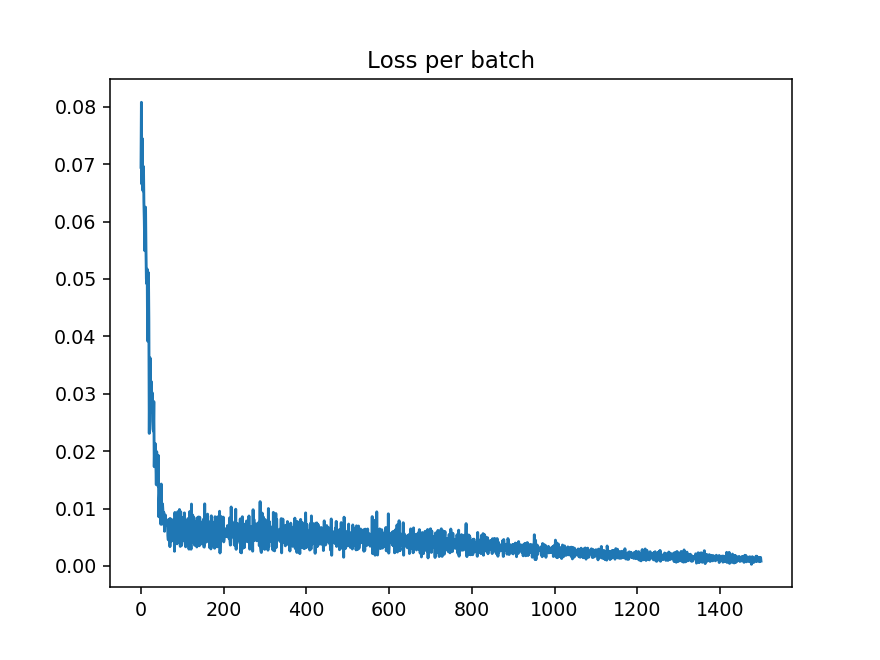

In [93]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_x, train_y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_y), verbose=2)
score = model.evaluate(test_x, test_y, batch_size=20)
print(score)
plot_losses(history.losses)

In [94]:
print("Training data accuracy")
for i in range(len(train_x)):
    print("True R_norm: " + str(sum(train_y[i]) / 6) + "\tPredicted R_norm: " + str(np.sum(model.predict(np.reshape(train_x[i], (1, 50))))/ 6))

Training data accuracy
True R_norm: 0.35000000000000003	Predicted R_norm: 0.3292396664619446
True R_norm: 0.21666666666666998	Predicted R_norm: 0.1647880176703135
True R_norm: 0.23333333333333003	Predicted R_norm: 0.16212852795918783
True R_norm: 0.36666666666667	Predicted R_norm: 0.3708588679631551
True R_norm: 0.19166666666667	Predicted R_norm: 0.16811581452687582
True R_norm: 0.11666666666667001	Predicted R_norm: 0.1613596280415853
True R_norm: 0.19999999999999998	Predicted R_norm: 0.17276916901270548
True R_norm: 0.17500000000000002	Predicted R_norm: 0.2017822265625
True R_norm: 0.27499999999999997	Predicted R_norm: 0.2601701021194458
True R_norm: 0.15	Predicted R_norm: 0.1675888697306315
True R_norm: 0.34166666666666995	Predicted R_norm: 0.3368113835652669
True R_norm: 0.16666666666667	Predicted R_norm: 0.17660987377166748
True R_norm: 0.18333333333333	Predicted R_norm: 0.19708585739135742
True R_norm: 0.083333333333333	Predicted R_norm: 0.16059629122416177
True R_norm: 0.30833333

In [95]:
print("Training data accuracy")
for i in range(len(test_x)):
    print("True R_norm: " + str(sum(test_y[i]) / 6) + "\tPredicted R_norm: " + str(np.sum(model.predict(np.reshape(test_x[i], (1, 50))))/ 6))

Training data accuracy
True R_norm: 0.35833333333333	Predicted R_norm: 0.3927975495656331
True R_norm: 0.225	Predicted R_norm: 0.13714274764060974
True R_norm: 0.10833333333333002	Predicted R_norm: 0.16102016965548197
True R_norm: 0.33333333333333	Predicted R_norm: 0.27770302693049115
True R_norm: 0.25833333333333	Predicted R_norm: 0.19344880183537802
True R_norm: 0.09999999999999999	Predicted R_norm: 0.16079199314117432
True R_norm: 0.39166666666667	Predicted R_norm: 0.41145193576812744
True R_norm: 0.40833333333333005	Predicted R_norm: 0.3538573185602824
True R_norm: 0.28333333333333005	Predicted R_norm: 0.28235679864883423
True R_norm: 0.375	Predicted R_norm: 0.33593424161275226


In [78]:
model.predict(np.reshape(train_x[i], (1, 50)))

array([[0.2440184 , 0.233531  , 0.23250115, 0.21954629, 0.23872703,
        0.21226317]], dtype=float32)